In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import metrics
from keras.callbacks import History 

import tensorflow as tf

In [2]:
x = np.random.uniform(low = -10, high = 10, size = 100)
eps = np.random.normal(loc = 0, scale = 15, size = 100)

In [3]:
y = -3 * x + 5 + eps

In [4]:
a, b = np.polyfit(x, y, deg = 1)
ypred = a * x + b
#Calculando o MSE segundo um modelo de regressão linear
mse_regLinear = np.mean((y - ypred)**2) 
mse_regLinear

230.55308258481963

In [5]:
a, b

(-2.99334940972909, 3.8928219842325285)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x.reshape(-1,1), y.reshape(-1, 1) )

lr.coef_, lr.intercept_, lr.score(x.reshape(-1,1), y.reshape(-1, 1) )

(array([[-2.99334941]]), array([3.89282198]), 0.5968718799615459)

Esse MSE sera usado como comparativo para verificar o resultado das redes neurais, já que o limite inferior, ou seja, o minimo que o MSE vai chegar é de 230.55

In [4]:
%load_ext tensorboard

In [5]:
# Train-test split:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [27]:
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

del rede_menos_simples
rede_menos_simples = tf.keras.models.Sequential()
rede_menos_simples.add(tf.keras.Input(shape=(1,)))
rede_menos_simples.add(tf.keras.layers.BatchNormalization())
rede_menos_simples.add(tf.keras.layers.Dense(3, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(1, activation='relu'))

'rm' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [28]:
rede_menos_simples.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001))

rede_menos_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=100, 
          batch_size=10,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/100
8/8 [==============================] - 0s 18ms/step - loss: 615.3572 - val_loss: 698.4816
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 611.0736 - val_loss: 697.6063
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 607.1237 - val_loss: 696.2092
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 603.8348 - val_loss: 694.5955
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 599.3955 - val_loss: 692.8008
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 593.8698 - val_loss: 690.7048
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 590.1494 - val_loss: 688.5570
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 584.8868 - val_loss: 686.2155
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 581.1403 - val_loss: 683.6954
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 573.5231 - val_los

In [29]:
rede_menos_simples.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 3)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 14
Trainable params: 12
Non-trainable params: 2
_________________________________________________________________


4/4 [==============================] - 0s 1ms/step


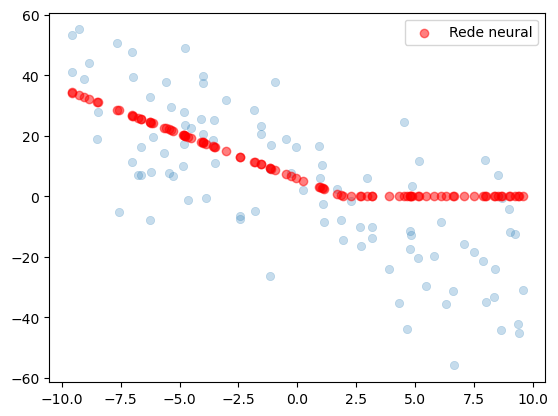

In [30]:
ypred = rede_menos_simples.predict(x)

plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(x, ypred, alpha = 0.5, color = 'red', label = 'Rede neural')
plt.legend()

In [68]:
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

del rede_menos_simples
rede_menos_simples = tf.keras.models.Sequential()
rede_menos_simples.add(tf.keras.Input(shape=(1,)))
rede_menos_simples.add(tf.keras.layers.BatchNormalization())
rede_menos_simples.add(tf.keras.layers.Dense(64, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(1, activation='relu'))

'rm' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [69]:
rede_menos_simples.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 1)                4         
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 64)                128       
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,245
Trainable params: 2,243
Non-trainable params: 2
_________________________________________________________________


In [70]:
rede_menos_simples.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001))

rede_menos_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=100, 
          batch_size=10,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 618.1194 - val_loss: 702.1832
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 613.1448 - val_loss: 699.3021
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 607.6744 - val_loss: 696.4375
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 602.2991 - val_loss: 693.2638
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 596.3981 - val_loss: 690.1195
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 587.4854 - val_loss: 686.4000
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 581.9697 - val_loss: 682.6532
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 578.6632 - val_loss: 678.8061
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 570.2169 - val_loss: 674.4125
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 558.9109 - val_lo

4/4 [==============================] - 0s 2ms/step


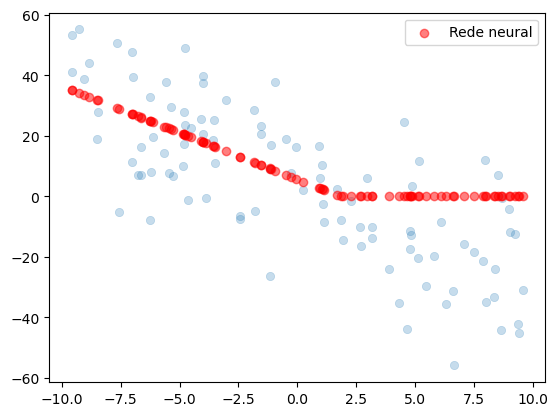

In [71]:
ypred = rede_menos_simples.predict(x)

plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(x, ypred, alpha = 0.5, color = 'red', label = 'Rede neural')
plt.legend()

Levando em consideração a primeira rede neural, adicionei mais uma camada e bem mais neuronios para ver o que mudaria. Resultado: 

1- Talvez pelo fato do conjunto de dados ser bem simples, nao teve alteração significativa no tempo de execução da rede. 

2- A loss mantevesse parecida com a primeira rede também. 

3- O MSE ficou maior do que o modelo de regressão linear, o que é previsto.

In [74]:
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

del rede_menos_simples
rede_menos_simples = tf.keras.models.Sequential()
rede_menos_simples.add(tf.keras.Input(shape=(1,)))
rede_menos_simples.add(tf.keras.layers.BatchNormalization())
rede_menos_simples.add(tf.keras.layers.Dense(64, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(2, activation='relu'))

'rm' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [75]:
rede_menos_simples.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_16 (Bat  (None, 1)                4         
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 64)                128       
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,278
Trainable params: 2,276
Non-trainable params: 2
_________________________________________________________________


In [76]:
rede_menos_simples.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001))

rede_menos_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=100, 
          batch_size=10,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/100
8/8 [==============================] - 1s 19ms/step - loss: 619.0833 - val_loss: 704.6415
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 617.2275 - val_loss: 704.2315
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 614.8690 - val_loss: 703.4183
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 613.0756 - val_loss: 702.4905
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 610.8160 - val_loss: 701.4098
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 609.1879 - val_loss: 700.3280
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 605.8576 - val_loss: 699.1257
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 603.8704 - val_loss: 697.8447
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 602.2135 - val_loss: 696.5412
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 598.3625 - val_los

4/4 [==============================] - 0s 1ms/step


ValueError: x and y must be the same size

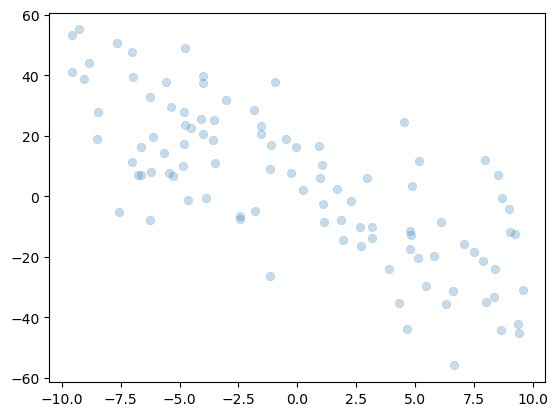

In [77]:
ypred = rede_menos_simples.predict(x)

plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(x, ypred, alpha = 0.5, color = 'red', label = 'Rede neural')
plt.legend()

Como teste, decidi criar 2 neuronios na ultima camada para testar a saida do modelo. De fato, como os dados reais tem uma dimensão, alterando a saida da rede para 2 neuronios, a saida passa a não ser mais 1D.

In [92]:
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

del rede_menos_simples
rede_menos_simples = tf.keras.models.Sequential()
rede_menos_simples.add(tf.keras.Input(shape=(1,)))
rede_menos_simples.add(tf.keras.layers.BatchNormalization())
rede_menos_simples.add(tf.keras.layers.Dense(64, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(1, activation='sigmoid'))

'rm' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [93]:
rede_menos_simples.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_20 (Bat  (None, 1)                4         
 chNormalization)                                                
                                                                 
 dense_46 (Dense)            (None, 64)                128       
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dense_48 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,245
Trainable params: 2,243
Non-trainable params: 2
_________________________________________________________________


In [94]:
rede_menos_simples.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001))

rede_menos_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=500, 
          batch_size=10,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/500
8/8 [==============================] - 1s 19ms/step - loss: 613.5927 - val_loss: 706.3169
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 613.0829 - val_loss: 707.0187
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 612.8804 - val_loss: 707.1726
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 612.1592 - val_loss: 707.1600
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 611.4998 - val_loss: 707.0496
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 611.2298 - val_loss: 706.8547
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 610.9197 - val_loss: 706.6383
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 610.2926 - val_loss: 706.4384
Epoch 9/500
8/8 [==============================] - 0s 5ms/step - loss: 610.0195 - val_loss: 706.2222
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 609.8372 - val_los

Epoch 161/500
8/8 [==============================] - 0s 5ms/step - loss: 600.7261 - val_loss: 698.1306
Epoch 162/500
8/8 [==============================] - 0s 5ms/step - loss: 601.3254 - val_loss: 698.1234
Epoch 163/500
8/8 [==============================] - 0s 5ms/step - loss: 600.5529 - val_loss: 698.1148
Epoch 164/500
8/8 [==============================] - 0s 5ms/step - loss: 600.7120 - val_loss: 698.1105
Epoch 165/500
8/8 [==============================] - 0s 5ms/step - loss: 600.7865 - val_loss: 698.1057
Epoch 166/500
8/8 [==============================] - 0s 6ms/step - loss: 601.2960 - val_loss: 698.0962
Epoch 167/500
8/8 [==============================] - 0s 5ms/step - loss: 602.0898 - val_loss: 698.0870
Epoch 168/500
8/8 [==============================] - 0s 6ms/step - loss: 600.4167 - val_loss: 698.0807
Epoch 169/500
8/8 [==============================] - 0s 5ms/step - loss: 600.6647 - val_loss: 698.0749
Epoch 170/500
8/8 [==============================] - 0s 6ms/step - loss: 

8/8 [==============================] - 0s 5ms/step - loss: 601.2760 - val_loss: 697.5486
Epoch 320/500
8/8 [==============================] - 0s 5ms/step - loss: 600.2007 - val_loss: 697.5464
Epoch 321/500
8/8 [==============================] - 0s 5ms/step - loss: 600.4949 - val_loss: 697.5474
Epoch 322/500
8/8 [==============================] - 0s 5ms/step - loss: 599.8315 - val_loss: 697.5433
Epoch 323/500
8/8 [==============================] - 0s 5ms/step - loss: 600.2626 - val_loss: 697.5415
Epoch 324/500
8/8 [==============================] - 0s 6ms/step - loss: 600.3747 - val_loss: 697.5355
Epoch 325/500
8/8 [==============================] - 0s 6ms/step - loss: 599.9604 - val_loss: 697.5351
Epoch 326/500
8/8 [==============================] - 0s 6ms/step - loss: 600.3902 - val_loss: 697.5329
Epoch 327/500
8/8 [==============================] - 0s 6ms/step - loss: 600.6971 - val_loss: 697.5305
Epoch 328/500
8/8 [==============================] - 0s 5ms/step - loss: 599.9243 - val

8/8 [==============================] - 0s 5ms/step - loss: 600.7135 - val_loss: 697.3378
Epoch 478/500
8/8 [==============================] - 0s 5ms/step - loss: 599.8334 - val_loss: 697.3374
Epoch 479/500
8/8 [==============================] - 0s 6ms/step - loss: 600.2298 - val_loss: 697.3375
Epoch 480/500
8/8 [==============================] - 0s 6ms/step - loss: 600.5657 - val_loss: 697.3361
Epoch 481/500
8/8 [==============================] - 0s 5ms/step - loss: 599.8881 - val_loss: 697.3358
Epoch 482/500
8/8 [==============================] - 0s 5ms/step - loss: 600.3431 - val_loss: 697.3330
Epoch 483/500
8/8 [==============================] - 0s 5ms/step - loss: 600.2734 - val_loss: 697.3322
Epoch 484/500
8/8 [==============================] - 0s 5ms/step - loss: 599.6618 - val_loss: 697.3289
Epoch 485/500
8/8 [==============================] - 0s 8ms/step - loss: 599.9749 - val_loss: 697.3292
Epoch 486/500
8/8 [==============================] - 0s 5ms/step - loss: 600.6193 - val

4/4 [==============================] - 0s 2ms/step


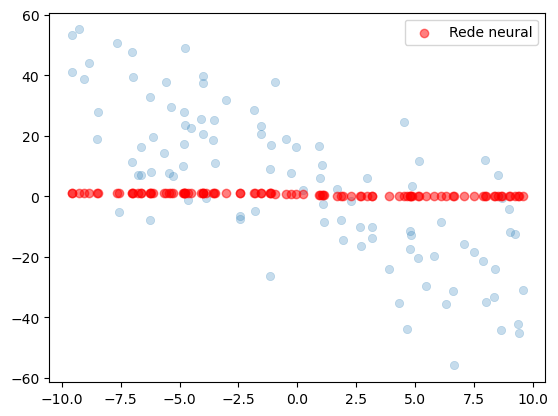

In [95]:
ypred = rede_menos_simples.predict(x)

plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(x, ypred, alpha = 0.5, color = 'red', label = 'Rede neural')
plt.legend()

Mudando a função de ativação da saida do modelo para sigmoid e mantendo a configuração da rede anterior, resultado: 

1- O tempo de execução da rede a cada epoca manteve-se igual a das anteriores. 

2- é possível ver que a loss da rede convergiu para 600. Decidi até aumentar o número de epocas para 500, 5x maior do que das redes anteriores e a loss nao saiu de 600. Muito maior do que das redes anteriores.

In [99]:
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

del rede_menos_simples
rede_menos_simples = tf.keras.models.Sequential()
rede_menos_simples.add(tf.keras.Input(shape=(1,)))
rede_menos_simples.add(tf.keras.layers.BatchNormalization())
rede_menos_simples.add(tf.keras.layers.Dense(64, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(1, activation='tanh'))

'rm' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [100]:
rede_menos_simples.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_22 (Bat  (None, 1)                4         
 chNormalization)                                                
                                                                 
 dense_52 (Dense)            (None, 64)                128       
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,245
Trainable params: 2,243
Non-trainable params: 2
_________________________________________________________________


In [101]:
rede_menos_simples.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001))

rede_menos_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=500, 
          batch_size=10,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/500
8/8 [==============================] - 1s 19ms/step - loss: 631.0502 - val_loss: 727.5149
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 624.9039 - val_loss: 711.6600
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 619.0173 - val_loss: 701.0571
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 614.4487 - val_loss: 694.6920
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 610.3252 - val_loss: 690.5199
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 609.6393 - val_loss: 688.3421
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 603.6843 - val_loss: 686.1462
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 604.2441 - val_loss: 684.6997
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 600.7469 - val_loss: 683.5755
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 600.1488 - val_los

Epoch 161/500
8/8 [==============================] - 0s 6ms/step - loss: 592.1043 - val_loss: 675.2315
Epoch 162/500
8/8 [==============================] - 0s 6ms/step - loss: 590.6069 - val_loss: 675.2308
Epoch 163/500
8/8 [==============================] - 0s 6ms/step - loss: 590.2784 - val_loss: 675.2228
Epoch 164/500
8/8 [==============================] - 0s 6ms/step - loss: 590.8176 - val_loss: 675.2165
Epoch 165/500
8/8 [==============================] - 0s 5ms/step - loss: 590.9944 - val_loss: 675.2111
Epoch 166/500
8/8 [==============================] - 0s 6ms/step - loss: 589.4980 - val_loss: 675.2071
Epoch 167/500
8/8 [==============================] - 0s 6ms/step - loss: 591.5836 - val_loss: 675.1992
Epoch 168/500
8/8 [==============================] - 0s 5ms/step - loss: 588.6758 - val_loss: 675.1943
Epoch 169/500
8/8 [==============================] - 0s 5ms/step - loss: 590.0570 - val_loss: 675.1941
Epoch 170/500
8/8 [==============================] - 0s 5ms/step - loss: 

8/8 [==============================] - 0s 5ms/step - loss: 591.1285 - val_loss: 674.7992
Epoch 320/500
8/8 [==============================] - 0s 5ms/step - loss: 590.9396 - val_loss: 674.7975
Epoch 321/500
8/8 [==============================] - 0s 5ms/step - loss: 588.9141 - val_loss: 674.7958
Epoch 322/500
8/8 [==============================] - 0s 5ms/step - loss: 589.9296 - val_loss: 674.7912
Epoch 323/500
8/8 [==============================] - 0s 5ms/step - loss: 590.2182 - val_loss: 674.7902
Epoch 324/500
8/8 [==============================] - 0s 5ms/step - loss: 589.7233 - val_loss: 674.7910
Epoch 325/500
8/8 [==============================] - 0s 5ms/step - loss: 592.3810 - val_loss: 674.7910
Epoch 326/500
8/8 [==============================] - 0s 5ms/step - loss: 589.4486 - val_loss: 674.7872
Epoch 327/500
8/8 [==============================] - 0s 5ms/step - loss: 588.1730 - val_loss: 674.7848
Epoch 328/500
8/8 [==============================] - 0s 5ms/step - loss: 590.4860 - val

8/8 [==============================] - 0s 5ms/step - loss: 589.0030 - val_loss: 674.6102
Epoch 478/500
8/8 [==============================] - 0s 6ms/step - loss: 588.7722 - val_loss: 674.6112
Epoch 479/500
8/8 [==============================] - 0s 5ms/step - loss: 588.5988 - val_loss: 674.6124
Epoch 480/500
8/8 [==============================] - 0s 6ms/step - loss: 590.3575 - val_loss: 674.6108
Epoch 481/500
8/8 [==============================] - 0s 6ms/step - loss: 590.6083 - val_loss: 674.6110
Epoch 482/500
8/8 [==============================] - 0s 6ms/step - loss: 591.1959 - val_loss: 674.6120
Epoch 483/500
8/8 [==============================] - 0s 7ms/step - loss: 589.3043 - val_loss: 674.6117
Epoch 484/500
8/8 [==============================] - 0s 6ms/step - loss: 589.6701 - val_loss: 674.6130
Epoch 485/500
8/8 [==============================] - 0s 6ms/step - loss: 590.1376 - val_loss: 674.6128
Epoch 486/500
8/8 [==============================] - 0s 6ms/step - loss: 591.3067 - val

4/4 [==============================] - 0s 2ms/step


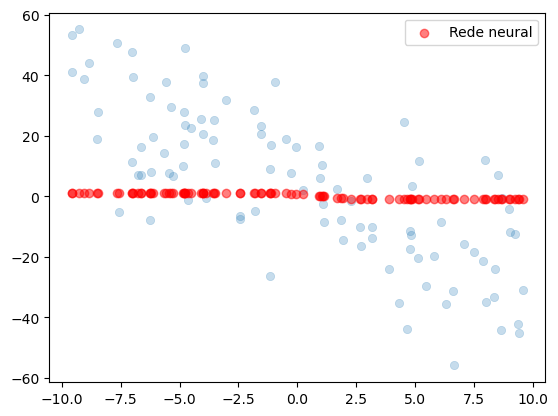

In [102]:
ypred = rede_menos_simples.predict(x)

plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(x, ypred, alpha = 0.5, color = 'red', label = 'Rede neural')
plt.legend()

Mudando a função de ativação da saida do modelo para tangente hiperbolica e mantendo a configuração da rede anterior, resultado:

1- O tempo de execução da rede a cada epoca manteve-se igual a das anteriores. 

2- é possível ver que a loss da rede convergiu para 590.

Parece que para esse conjunto de dados, a melhor função de ativação da ultima camada é a ReLU

Dependendo do conjunto de dados treinados/testados, algumas funções de ativação se comportam melhor do que outras, tendo reflexo direto a loss.

In [103]:
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

del rede_menos_simples
rede_menos_simples = tf.keras.models.Sequential()
rede_menos_simples.add(tf.keras.Input(shape=(1,)))
rede_menos_simples.add(tf.keras.layers.BatchNormalization())
rede_menos_simples.add(tf.keras.layers.Dense(64, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(32, input_shape=(1, )))
rede_menos_simples.add(tf.keras.layers.Dense(1, activation='relu'))

'rm' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [104]:
rede_menos_simples.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_23 (Bat  (None, 1)                4         
 chNormalization)                                                
                                                                 
 dense_55 (Dense)            (None, 64)                128       
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                     

In [105]:
rede_menos_simples.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001))

rede_menos_simples.fit(x=X_train, 
          y=Y_train, 
          epochs=500, 
          batch_size=10,
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/500
8/8 [==============================] - 1s 22ms/step - loss: 622.9692 - val_loss: 710.7507
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 9/500
8/8 [==============================] - 0s 7ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_los

Epoch 161/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 162/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 163/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 164/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 165/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 166/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7358 - val_loss: 710.7507
Epoch 167/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 168/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 169/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 170/500
8/8 [==============================] - 0s 5ms/step - loss: 

8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 320/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 321/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 322/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 323/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 324/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 325/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 326/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 327/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 328/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val

8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 478/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 479/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 480/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 481/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7358 - val_loss: 710.7507
Epoch 482/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 483/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 484/500
8/8 [==============================] - 0s 6ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 485/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val_loss: 710.7507
Epoch 486/500
8/8 [==============================] - 0s 5ms/step - loss: 622.7357 - val

4/4 [==============================] - 0s 2ms/step


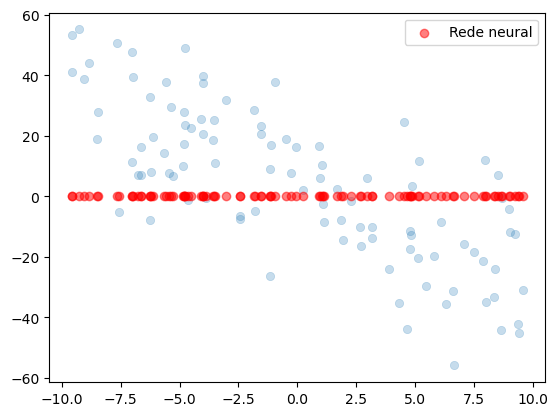

In [106]:
ypred = rede_menos_simples.predict(x)

plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(x, ypred, alpha = 0.5, color = 'red', label = 'Rede neural')
plt.legend()

Como ultimo teste, decidi colocar varias camadas a mais e varios neuronios em cada camada e a loss convergiu para 622, o que acredito que seja um possível indicio de overfitting. Conclusão: Não é porque foi adicionado mais camadas/neuronios que o modelo irá generalizar melhor.

É possível constatar que o modelo linear simples teve melhor resultando, tendo o MSE de 230.55, enquanto a loss da melhor rede chegou a 346.7. É provalvel que esse comportamento tenha esse resultado pelo fato do conjuto de dados ser bem simples. 

Ps:. Todos as analises em relação ao loss, valem tambem para o val_loss, ja que mantiveram o mesmo comportamento. (com excessão da primeira rede neural)
Ps:. É possível que a primeira rede neural convergisse para o MSE do modelo linear simples se rodasse mais epocas, mas o tempo de treinamento da rede seria muito maior do que do modelo linear simples. 

Qualquer duvida, fico a disposição. Obrigado.